<a href="https://colab.research.google.com/github/bisaq/ok/blob/main/CSC3160_2024_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

The goal of assignment 3 is for your learn TD-IDF, cosine similarity, and embedding.

Here are four types of data (i.e. four categories of lyrics)
* https://slpcourse.github.io/materials/lyrics/country.txt
* https://slpcourse.github.io/materials/lyrics/pop.txt
* https://slpcourse.github.io/materials/lyrics/rap.txt
* https://slpcourse.github.io/materials/lyrics/rock.txt

Each song is segmented by `<SONG_BOUNDARY>`

## Task 1: TF-IDF [60 marks]

Implement the TF-IDF algorithm. You need to write your own compute_tf, and compute_idf functions.

In [24]:
import requests
from sklearn.feature_extraction.text import TfidfVectorizer

import math
from collections import Counter
urls = [
    'https://slpcourse.github.io/materials/lyrics/country.txt',
    'https://slpcourse.github.io/materials/lyrics/pop.txt',
    'https://slpcourse.github.io/materials/lyrics/rap.txt',
    'https://slpcourse.github.io/materials/lyrics/rock.txt'
]

# 读取文件内容
def read_file_from_url(url):
    """从 URL 读取文本文件内容。"""
    response = requests.get(url)
    response.raise_for_status()  # 检查请求是否成功
    return response.text

# 下载并读取所有文件
documents = [read_file_from_url(url) for url in urls]



def compute_tf(doc):
    """Compute term frequency for a single document."""
    tf = {}
    # Tokenize document
    words = doc.split()
    total_terms = len(words)
    # Count occurrences of each term
    term_count = Counter(words)
    # Compute TF
    for term, count in term_count.items():
        tf[term] = count / total_terms
    return tf

def compute_idf(documents):
    """Compute inverse document frequency for a set of documents."""
    idf = {}
    N = len(documents)
    # Count the number of documents containing each term
    doc_count = Counter()
    for doc in documents:
        terms = set(doc.split())
        for term in terms:
            doc_count[term] += 1
    # Compute IDF
    for term, count in doc_count.items():
        idf[term] = math.log(N / (1 + count))  # Add 1 to avoid division by zero
    return idf

def compute_tfidf(documents):
    """Compute TF-IDF for a set of documents."""
    tfidf = []
    idf = compute_idf(documents)
    for doc in documents:
        tf = compute_tf(doc)
        doc_tfidf = {term: tf[term] * idf.get(term, 0) for term in tf}
        tfidf.append(doc_tfidf)
    return tfidf

def write_tfidf_to_file(tfidf, filenames):
    """Write TF-IDF scores to files."""
    for idx, doc_tfidf in enumerate(tfidf):
        with open(filenames[idx], 'w') as f:
            f.write(f"Document {idx + 1} TF-IDF:\n")
            for term, score in doc_tfidf.items():
                f.write(f"  {term}: {score:.4f}\n")

# Compute TF-IDF
tfidf = compute_tfidf(documents)

tfidf = compute_tfidf(documents)

# Define filenames for output
filenames = [
    "document_1_tfidf.txt",
    "document_2_tfidf.txt",
    "document_3_tfidf.txt",
    "document_4_tfidf.txt"
]

# Write TF-IDF results to files
write_tfidf_to_file(tfidf, filenames)

print("TF-IDF results have been written to files.")


TF-IDF results have been written to files.


## Task 2: Kmeans clustering [40 marks]

Perform kmeans clustering with the TF-IDF weights. You need to initialize the kmeans centroid in two different ways: random initialization, and smart initialization where you initialize the centroid with a vector from each category.

Here are your tasks

*   Visualize the clustering results from random initialization. each cluster need to have its own color, and highlight the centroid
*   Visualize the clustering results from smart initialization. each cluster need to have its own color, and highlight the centroid
*   Calculate the cosine similarity of the kmeans centroid from smart initialization. Present your result in a table
*   Discuss the difference and your observation

You may use scikit-learn for kmeans clustering and t-SNE visualization



In [25]:
import numpy as np
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

def compute_tfidf_matrix(documents):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    return tfidf_matrix, vectorizer.get_feature_names_out()


tfidf_dense, feature_names = compute_tfidf_matrix(documents)


In [27]:
from sklearn.cluster import KMeans

def perform_kmeans(tfidf_matrix, n_clusters, init_type='random'):
    if init_type == 'smart':
        # Smart initialization: use first n_samples as initial centroids
        init = tfidf_matrix[:n_clusters]
        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=1, random_state=42)
    else:
        # Random initialization
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=42)

    kmeans.fit(tfidf_matrix)
    return kmeans

# Perform KMeans with random initialization
kmeans_random = perform_kmeans(tfidf_dense.toarray(), n_clusters=2, init_type='random')

# Perform KMeans with smart initialization
kmeans_smart = perform_kmeans(tfidf_dense.toarray(), n_clusters=2, init_type='smart')

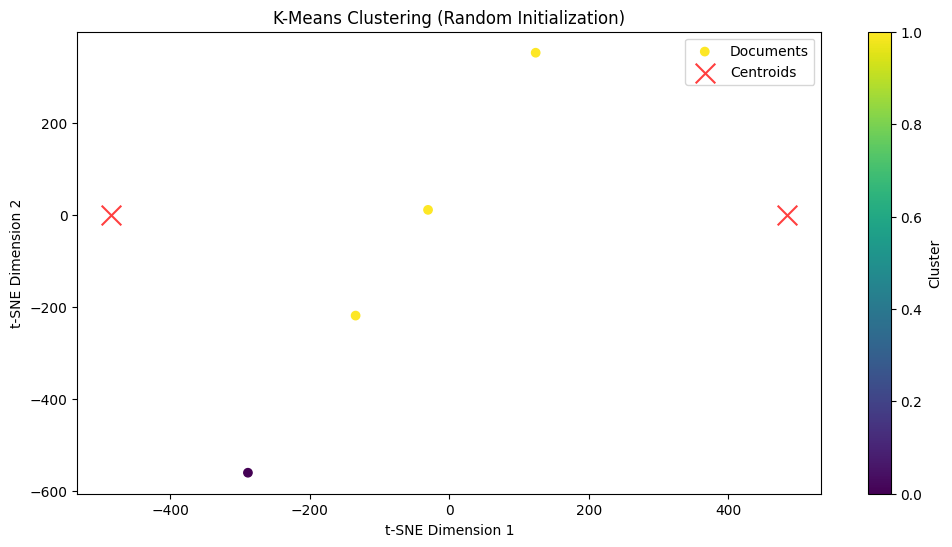

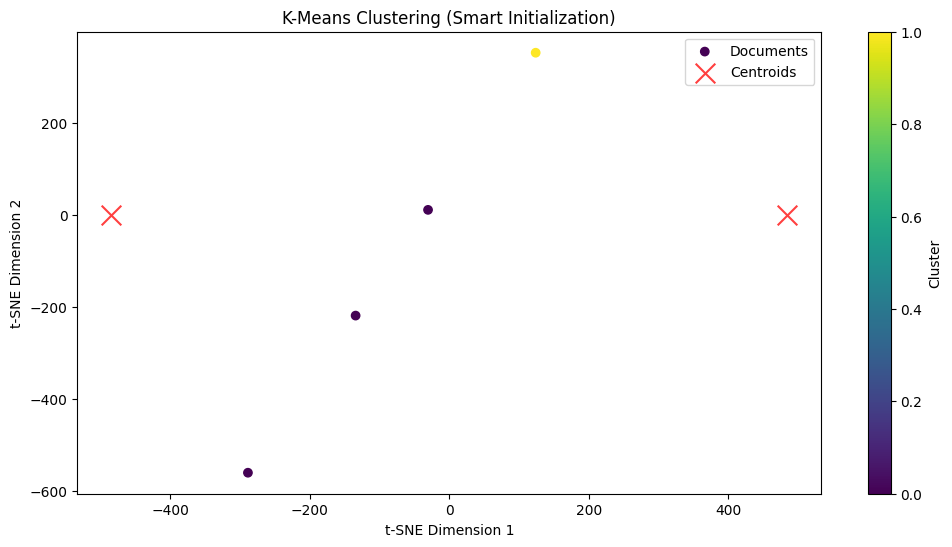

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def visualize_clusters(tfidf_matrix, kmeans, title):
  # Reduce dimensions of centroids using PCA
    pca = PCA(n_components=2)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
    # Use t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=min(centroids_pca.shape[0] - 1, 30), random_state=42)
    reduced_data = tsne.fit_transform(tfidf_matrix.toarray())

    # Create a scatter plot
    plt.figure(figsize=(12, 6))

    # Plot document points
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', label='Documents')



    # Transform centroids to the same space as documents
    transformed_centroids = tsne.fit_transform(centroids_pca)

    # Plot centroids
    plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Centroids')

    # Add labels and legend
    plt.title(title)
    plt.legend()
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')

    # Show plot
    plt.show()

# Visualize K-Means with random initialization
visualize_clusters(tfidf_dense, kmeans_random, 'K-Means Clustering (Random Initialization)')

# Visualize K-Means with smart initialization
visualize_clusters(tfidf_dense, kmeans_smart, 'K-Means Clustering (Smart Initialization)')
